In [ ]:
from ClimSim.climsim_utils import
import xarray as xr
import os

HIGH_RES_SAMPLE_PATH = "ClimSim_high-res/train/0002-01"
HIGH_RES_GRID_PATH = "ClimSim_high-res/ClimSim_high-res_grid-info.nc"
NORM_PATH = "ClimSim/preprocessing/normalizations/"

In [14]:
grid_info = xr.open_dataset(HIGH_RES_GRID_PATH)
samples_list = os.listdir(HIGH_RES_SAMPLE_PATH)

sample_ds = xr.open_dataset(os.path.join(HIGH_RES_SAMPLE_PATH, samples_list[0]))
grid_ds = xr.open_dataset(HIGH_RES_GRID_PATH)


In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from scipy.interpolate import griddata

class ClimSimMapper:
    def __init__(self, grid_ds):
        self.grid_ds = grid_ds
        # On récupère les coordonnées de chaque colonne
        self.lats = grid_ds.lat.values
        self.lons = grid_ds.lon.values
        
    def plot_smooth_map(self, data_vector, title=""):
        grid_lon = np.linspace(0, 360, 360)
        grid_lat = np.linspace(-90, 90, 180)
        lon_2d, lat_2d = np.meshgrid(grid_lon, grid_lat)

        # Interpolation to a regular grid to have proper colormesh
        grid_z = griddata((self.lons, self.lats), data_vector, 
                        (lon_2d, lat_2d), method='nearest')

        plt.figure(figsize=(15, 7))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        img = ax.pcolormesh(grid_lon, grid_lat, grid_z, transform=ccrs.PlateCarree(), cmap='RdYlBu_r')
        plt.colorbar(img)
        plt.title(title)

In [49]:
print(sample_ds.data_vars)

Data variables:
    ymd               int32 4B 20101
    tod               int32 4B ...
    cam_in_ALDIF      (ncol) float64 173kB ...
    cam_in_ALDIR      (ncol) float64 173kB ...
    cam_in_ASDIF      (ncol) float64 173kB ...
    cam_in_ASDIR      (ncol) float64 173kB ...
    cam_in_ICEFRAC    (ncol) float64 173kB ...
    cam_in_LANDFRAC   (ncol) float64 173kB ...
    cam_in_LWUP       (ncol) float64 173kB ...
    cam_in_OCNFRAC    (ncol) float64 173kB ...
    cam_in_SNOWHICE   (ncol) float64 173kB ...
    cam_in_SNOWHLAND  (ncol) float64 173kB ...
    pbuf_COSZRS       (ncol) float64 173kB ...
    pbuf_LHFLX        (ncol) float64 173kB ...
    pbuf_SHFLX        (ncol) float64 173kB ...
    pbuf_SOLIN        (ncol) float64 173kB ...
    pbuf_TAUX         (ncol) float64 173kB ...
    pbuf_TAUY         (ncol) float64 173kB ...
    state_pmid        (lev, ncol) float64 10MB ...
    state_ps          (ncol) float64 173kB ...
    state_q0001       (lev, ncol) float64 10MB ...
    state_q

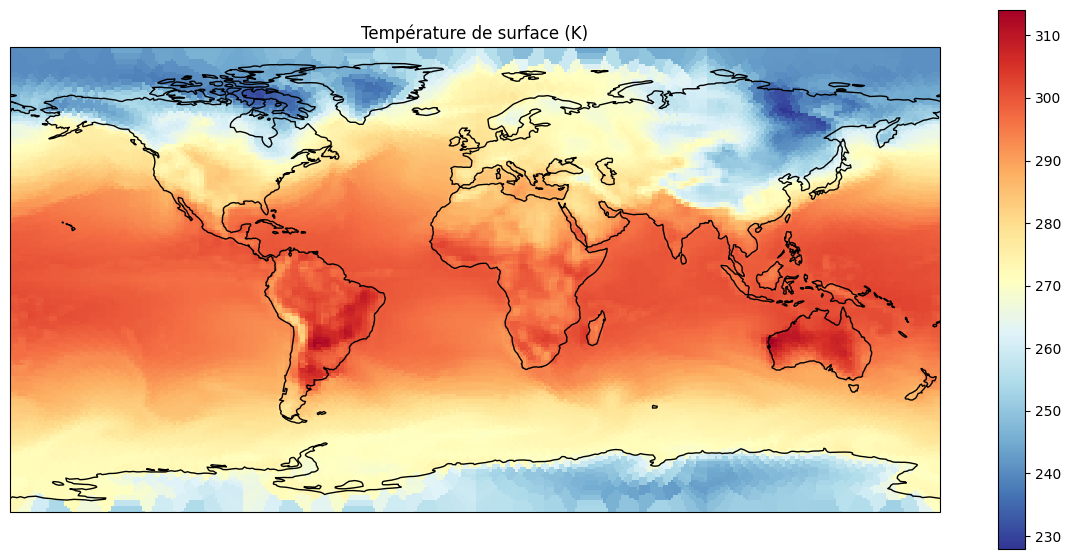

In [48]:
# Initialisation
mapper = ClimSimMapper(grid_info)
sample_to_plot = sample_ds['state_t'].isel(lev=-1).values
mapper.plot_smooth_map(sample_to_plot, title="Température de surface (K)")

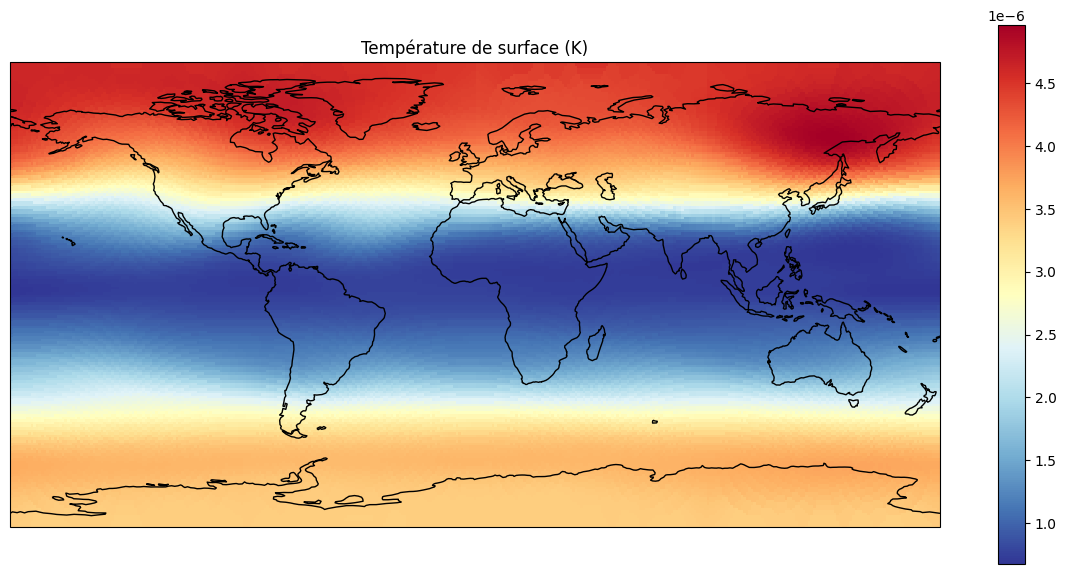

In [59]:
sample_to_plot = sample_ds['pbuf_ozone'].isel(lev=16).values
mapper.plot_smooth_map(sample_to_plot, title="Température de surface (K)")